# Text-to-Text Similarity : Resnik 1995

We are going to move on now to techniques which require the use of corpora because they incorporate in their formulas the probability of particular words or concepts occuring.

This probability of words occuring is called Information Content (IC) and is defined as $-logP(c)$ where $P(c)$ is the probability of encountering an instance of a concept c in a large corpus. Notice that the less often a concept occurs the more Information Content it provides, this idea is pulled straight out of Information Theory.

The problem (or advantage) of this these approaches is that you can get better results if the corpora are very much like the short answers you are scoring, however, if the corpora are, for instance, the complete works of Shakespeare and you try to calculate the IC of words about computers the similarities will not be as accurate. Because of this, I'm interested to see how these methods perform.

The Resnik formula for the similarity between two texts is:
$$
Sim_{res} = IC(LCS)
$$

I've decided to use the Brown Corpus for calculating the information content of words because it provides a broad array of input texts from many different disciplines and is readily available in the NLTK python package.

#### References

1. [NLTK Accessing Corpora](https://www.nltk.org/book/ch02.html)
2. [Brown Corpus](https://en.wikipedia.org/wiki/Brown_Corpus)
2. [Resnik 1995 - Using Information Content to Evaluate Semantic Similarity](./papers/Resnik_1995-using-info-content-to-evaluate-semantic-similarity.pdf)


In [7]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.text2text as tt
from importlib import reload
from nltk.corpus import wordnet_ic
import spacy

<module 'libs.text2text' from '../libs/text2text.py'>

In [4]:
# Load Dataset
df2_en = utils.load_dataframe(language='en', version=2)
print(len(df2_en))

nlp_en = spacy.load('en')

# prepare the corpus for calculating IC
brown_ic = wordnet_ic.ic('ic-brown.dat')

2442


## E1.1 v2.0_en Resnik [Brown corpus]

In [8]:
resnik_func = tt.create_resnik_function(brown_ic)

e11_res = tt.run_entailment_model(nlp_en, df2_en, 
                                  sim_fn=resnik_func, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

batch: 300 done.
batch: 600 done.
batch: 900 done.
batch: 1200 done.
batch: 1500 done.
batch: 1800 done.
batch: 2100 done.
batch: 2400 done.


Accuracy: 22.482%
Precision: 52.888%
Recall: 22.482%
F1-Measure: 26.872%
Pearson's R: 0.29
Cohen's Kappa: 0.07
RMSE: 2.03
MAE: 1.56
Y-True Mean: 4.15
Y-Pred Mean: 2.79
Y-True Std Deviation: 1.12
Y-Pred Std Deviation: 1.39


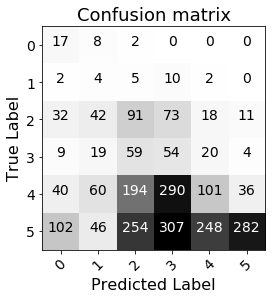

In [9]:
stats.print_big4(e11_res['y_true'], e11_res['y_pred'])
stats.print_stats(e11_res['y_true'], e11_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e11_res['y_true'], e11_res['y_pred']), classes=np.unique(e11_res['y_true']))

## E1.2 v1.0_en Resnik [Brown]

In [10]:
# Load Dataset
df1_en = utils.load_dataframe(language='en', version=1)
print(len(df1_en))

e12_res = tt.run_entailment_model(nlp_en, df1_en, 
                                  sim_fn=resnik_func, 
                                  lang='eng',
                                  stop_words=pp.EN_STOPS,
                                  add_lexical_matching=False,
                                  open_classes=['NOUN', 'VERB', 'ADJ'])

630
batch: 300 done.
batch: 600 done.


Accuracy: 26.349%
Precision: 50.191%
Recall: 26.349%
F1-Measure: 29.020%
Pearson's R: 0.31
Cohen's Kappa: 0.10
RMSE: 1.86
MAE: 1.38
Y-True Mean: 4.03
Y-Pred Mean: 2.91
Y-True Std Deviation: 1.18
Y-Pred Std Deviation: 1.33


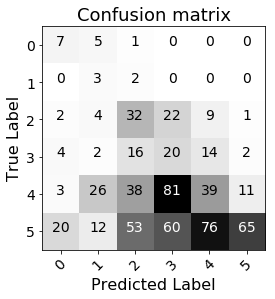

In [11]:
stats.print_big4(e12_res['y_true'], e12_res['y_pred'])
stats.print_stats(e12_res['y_true'], e12_res['y_pred'])
stats.plot_confusion_matrix(stats.cm(e12_res['y_true'], e12_res['y_pred']), classes=np.unique(e12_res['y_true']))